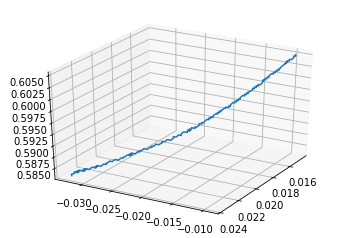

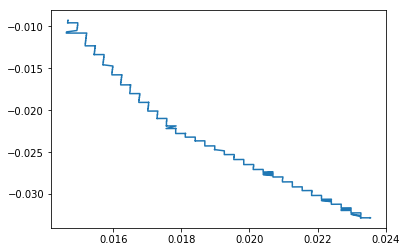

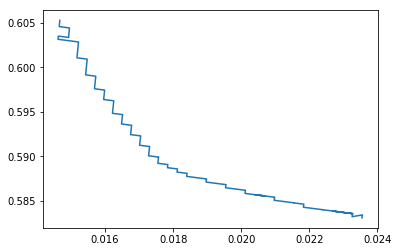

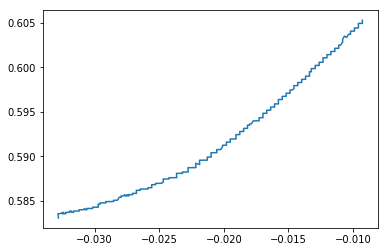

,T,X,Y,Z
1,1,0.014673,-0.009286,0.605316
9,5,0.014664,-0.009281,0.604961
15,8,0.014663,-0.009443,0.604960
33,17,0.014664,-0.009593,0.604957
47,24,0.014655,-0.009588,0.604603


In [264]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from matplotlib import cm
# Read raw data; select only Mth1
df = pd.read_table('S119d3d.txt', header = 0,delim_whitespace=True)
df.columns= ['Method','Step','T','X','Y','Z']
df = df.drop('Step',1)
df = df[df['Method'] == 'Mth1']
df = df.drop('Method',1)
df.to_csv('Mth1.csv')
df = df.drop_duplicates(subset = ['X','Y','Z'])
X = df['X']
Y = df['Y']
Z = df['Z']
dataX = np.asarray(X)
dataY = np.asarray(Y)
dataZ = np.asarray(Z)

# Plot XYZ, XY, XZ, and YZ projection
# It shows there is a "twist" around X ~ 0.018
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dataX, dataY, dataZ)
ax.view_init(30, 30)
plt.show()
plt.figure()
plt.plot(X,Y)
plt.show()
plt.figure()
plt.plot(X,Z)
plt.show()
plt.figure()
plt.plot(Y,Z)
plt.show()
df.head()

In [265]:
# Separate data at X = 0.018
df1 =df[df['X']<0.018] 
X1 = df1['X']
Y1 = df1['Y']
Z1 = df1['Z']
dataX1 = np.asarray(X1)
dataY1 = np.asarray(Y1)
dataZ1 = np.asarray(Z1)
df2 =df[df['X']>0.018] 
X2 = df2['X']
Y2 = df2['Y']
Z2 = df2['Z']
dataX2 = np.asarray(X2)
dataY2 = np.asarray(Y2)
dataZ2 = np.asarray(Z2)
'''
plt.show()
plt.figure()
plt.plot(X1,Y1)
plt.show()
plt.figure()
plt.plot(X1,Z1)
plt.show()
plt.figure()
plt.plot(Y1,Z1)
plt.show()
plt.figure()
plt.plot(X2,Y2)
plt.show()
plt.figure()
plt.plot(X2,Z2)
plt.show()
plt.figure()
plt.plot(Y2,Z2)
plt.show()
'''

'\nplt.show()\nplt.figure()\nplt.plot(X1,Y1)\nplt.show()\nplt.figure()\nplt.plot(X1,Z1)\nplt.show()\nplt.figure()\nplt.plot(Y1,Z1)\nplt.show()\nplt.figure()\nplt.plot(X2,Y2)\nplt.show()\nplt.figure()\nplt.plot(X2,Z2)\nplt.show()\nplt.figure()\nplt.plot(Y2,Z2)\nplt.show()\n'

In [266]:
# Define parabolic curve in 2D
def Linear(x,a,b):
    y = a+b*x
    return y

def Parabola(x,a,b,c):
    y = a+b*x+c*x**2
    return y

# Define parabolic curve in 3D
def Parabola_3D(X,a,b,c,d,e,f):
    (x,y) = X
    z = a*x**2+b*y**2+c*x*y+d*x+e*y+f
    return z

In [267]:
# Fit YZ projection
paramsYZ, pcovYZ = curve_fit(Parabola, dataY, dataZ)

In [268]:
dataYZ_fit = Parabola(dataY, paramsYZ[0], paramsYZ[1],paramsYZ[2])

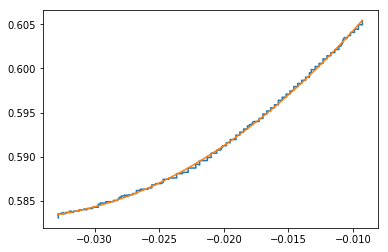

In [269]:
# The fitting looks reasonable. 
plt.figure()
plt.plot(dataY,dataZ)
plt.plot(dataY,dataYZ_fit)
plt.show()

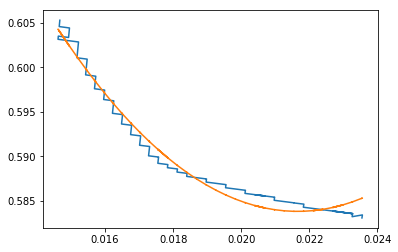

In [270]:
# Fit XZ projection
# The fitting doesn't look reasonable. 

paramsXZ, pcovXZ = curve_fit(Parabola, dataX, dataZ)
dataXZ_fit = Parabola(dataX, paramsXZ[0], paramsXZ[1],paramsXZ[2])
plt.figure()
plt.plot(dataX,dataZ)
plt.plot(dataX,dataXZ_fit)
plt.show()

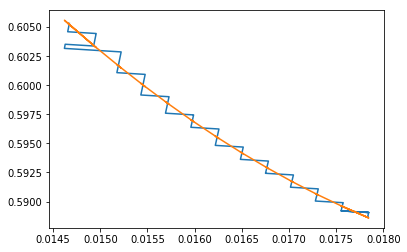

In [271]:
# Fit XZ projection for X<0.018
# The fitting looks reasonable. 
paramsXZ1, pcovXZ1 = curve_fit(Parabola, dataX1, dataZ1)
dataXZ1_fit = Parabola(dataX1, paramsXZ1[0], paramsXZ1[1],paramsXZ1[2])
plt.figure()
plt.plot(dataX1,dataZ1)
plt.plot(dataX1,dataXZ1_fit)
plt.show()

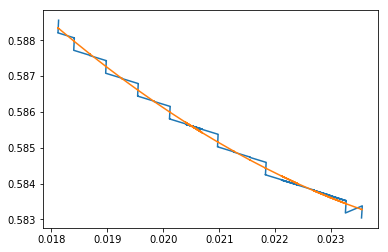

In [272]:
# Fit XZ projection for X>0.018
# The fitting looks reasonable. 
paramsXZ2, pcovXZ2 = curve_fit(Parabola, dataX2, dataZ2)
dataXZ2_fit = Parabola(dataX2, paramsXZ2[0], paramsXZ2[1],paramsXZ2[2])
plt.figure()
plt.plot(dataX2,dataZ2)
plt.plot(dataX2,dataXZ2_fit)
plt.show()

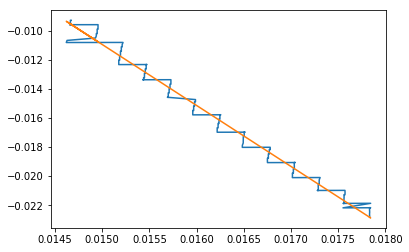

[ 0.05195404 -4.19329165]


In [273]:
# Fit XY projection for X<0.018
# The fitting looks reasonable. 
paramsXY1, pcovXY1 = curve_fit(Linear, dataX1, dataY1)
dataXY1_fit = Linear(dataX1, paramsXY1[0], paramsXY1[1])
plt.figure()
plt.plot(dataX1,dataY1)
plt.plot(dataX1,dataXY1_fit)
plt.show()
print(paramsXY1)

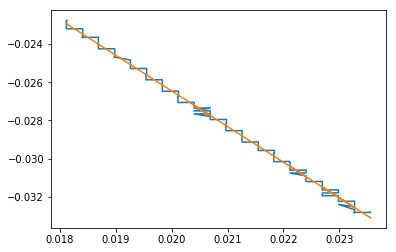

[ 0.01088369 -1.86707236]


In [274]:
# Fit XY projection for X>0.018
# The fitting looks reasonable. 
paramsXY2, pcovXY2 = curve_fit(Linear, dataX2, dataY2)
dataXY2_fit = Linear(dataX2, paramsXY2[0], paramsXY2[1])
plt.figure()
plt.plot(dataX2,dataY2)
plt.plot(dataX2,dataXY2_fit)
plt.show()
print(paramsXY2)

In [275]:
# Fit XYZ projection for X>0.018
dataXY2 = (dataX2,dataXY2_fit)

In [276]:
paramsXYZ2, pcovXYZ2 = curve_fit(Parabola_3D, dataXY2, dataZ2)

In [277]:
dataZ2_fit = Parabola_3D(dataXY2,paramsXYZ2[0],paramsXYZ2[1],paramsXYZ2[2],paramsXYZ2[3],paramsXYZ2[4],paramsXYZ2[5])

[ -3.16756646e+05   1.79909756e+05   1.66212541e+05  -7.20930263e+03
  -6.80647614e+03   5.34037673e+01]


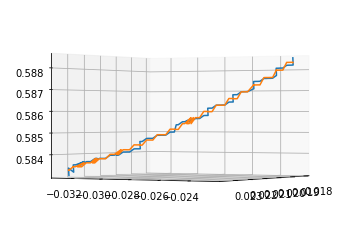

In [278]:
print(paramsXYZ2)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dataX2, dataY2, dataZ2)
ax.plot(dataX2, dataY2, dataZ2_fit)
ax.view_init(0, 30)
plt.show()

[-325.66895021    4.15032331 -159.62001047    7.23890526    3.79295313
    0.58229553]


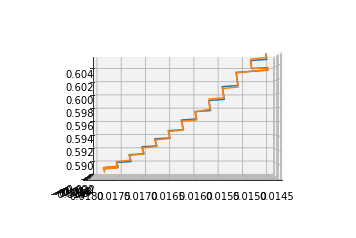

In [282]:
dataXY1 = (dataX1,dataY1)
paramsXYZ1, pcovXYZ1 = curve_fit(Parabola_3D, dataXY1, dataZ1)
dataZ1_fit = Parabola_3D(dataXY1,paramsXYZ1[0],paramsXYZ1[1],paramsXYZ1[2],paramsXYZ1[3],paramsXYZ1[4],paramsXYZ1[5])
print(paramsXYZ1)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(dataX1, dataY1, dataZ1)
ax.plot(dataX1, dataY1, dataZ1_fit)
ax.view_init(0, 90)
plt.show()

In [280]:
print(dataXY1)

(array([ 0.01467251,  0.01466392,  0.01466325,  0.01466376,  0.01465518,
        0.01495648,  0.01495587,  0.01495632,  0.01494758,  0.01494701,
        0.01494743,  0.01493868,  0.01493817,  0.01492979,  0.01462856,
        0.01462031,  0.01492092,  0.01522137,  0.01521207,  0.01521233,
        0.01520344,  0.01520309,  0.0152033 ,  0.01519441,  0.01519412,
        0.01519428,  0.01518539,  0.01518527,  0.01517639,  0.01517657,
        0.01517627,  0.01547571,  0.01546666,  0.0154668 ,  0.01546654,
        0.0154575 ,  0.01545759,  0.01545739,  0.01544835,  0.01544839,
        0.01544824,  0.01543921,  0.0154392 ,  0.01543017,  0.01572861,
        0.01572852,  0.01572845,  0.01571926,  0.01571922,  0.01571911,
        0.01570993,  0.01570994,  0.01570979,  0.0157006 ,  0.01570068,
        0.01570047,  0.01569129,  0.01598901,  0.01598876,  0.01597942,
        0.01597959,  0.01597929,  0.01596995,  0.01597018,  0.01596983,
        0.0159605 ,  0.01596079,  0.01596038,  0.01625732,  0.0